<a href="https://colab.research.google.com/github/Kathryn-Hise/Real_Estate_ML_Project/blob/main/Feature_Importance_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Importance Testing
Each Module has the following:
* Trained Regressor
* Regressor Score
* Important Features from Regressor

##Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Common utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier

#Other Utilities
from sklearn.inspection import permutation_importance

###Dr. D Functions

In [ ]:
# A custom version of PredictionErrorDisplay 
def make_regression_plot(reg):
  plt.plot(reg.predict(X_train), y_train, 'bo', alpha=0.2, label='Train')
  plt.plot(reg.predict(X_test), y_test, 'ro', alpha=0.8, label='Test')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.gca().set_aspect('equal') # square aspect ratio
  plt.legend()
  plt.grid()

In [ ]:
scores = dict() #set up dictonary to store all scores

##Import and Clean Data

In [ ]:
dfTrain = pd.read_csv('https://raw.githubusercontent.com/Kathryn-Hise/Real_Estate_ML_Project/main/train.csv') 
df = pd.get_dummies(dfTrain,dtype=float)
df.dropna(axis=1)
df.loc[:, ~df.columns.isin(['LotFrontage', 'MasVnrArea','GarageYrBlt'])]
df = df.drop(columns=['LotFrontage', 'MasVnrArea','GarageYrBlt', 'Id'],axis=1)
y = df['SalePrice'].to_numpy()
X = df.loc[:, df.columns!='SalePrice'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

##Regressors

###Linear Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', LinearRegression() ) ]
lin_pipe = Pipeline(estimators)

lin_pipe.fit(X_train, y_train)

print(f"Train Score:\t{lin_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{lin_pipe.score(X_test,y_test):0.3f}")

scores['LinearRegressor'] = lin_pipe.score(X_test,y_test)

Train Score:	0.944
Test Score:	-261519902388856368922624.000


In [ ]:
make_regression_plot(lin_pipe)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: ignored

###Histogram-based Gradient Boosting Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', HistGradientBoostingRegressor() ) ]
hist_pipe = Pipeline(estimators)

hist_pipe.fit(X_train, y_train)

print(f"Train Score:\t{hist_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{hist_pipe.score(X_test,y_test):0.3f}")

scores['HistGradientBoostingRegressor'] = hist_pipe.score(X_test,y_test)

Train Score:	0.976
Test Score:	0.844


###Logistic Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', LogisticRegression(max_iter=50) ) ]
log_pipe = Pipeline(estimators)

log_pipe.fit(X_train, y_train)

print(f"Train Score:\t{log_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{log_pipe.score(X_test,y_test):0.3f}")

scores['LogisticRegression'] = log_pipe.score(X_test,y_test)

Train Score:	0.998
Test Score:	0.007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# estimators = [('scaler', StandardScaler()), ('reg', LogisticRegressionCV() ) ]
# logcv_pipe = Pipeline(estimators)

# #logcv_pipe.fit(X_train, y_train)

# print(f"Train Score:\t{logcv_pipe.score(X_train, y_train):0.3f}")
# print(f"Test Score:\t{logcv_pipe.score(X_test,y_test):0.3f}")

# scores['LogisticRegression'] = logcv_pipe.score(X_test,y_test)

###Random Forest w/ Logistic Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', RandomForestClassifier() ) ]
rf_pipe = Pipeline(estimators)

param_grid = [
    {'classifier' : [LogisticRegression]}
]

rf_pipe.fit(X_train, y_train)

print(f"Train Score:\t{rf_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{rf_pipe.score(X_test,y_test):0.3f}")

scores['LogisticRegression'] = rf_pipe.score(X_test,y_test)

Train Score:	1.000
Test Score:	0.010


####Plot


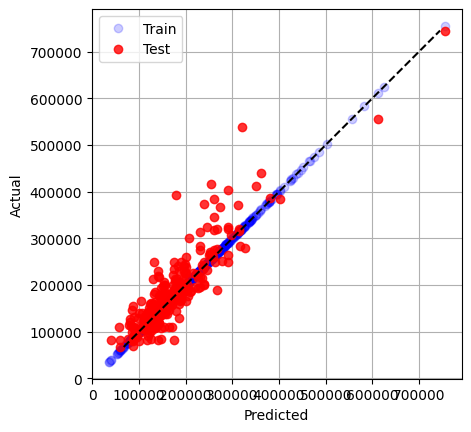

In [ ]:
make_regression_plot(rf_pipe)

###Random Forest Regressor

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', RandomForestRegressor() ) ]
rfr_pipe = Pipeline(estimators)

rfr_pipe.fit(X_train, y_train)

print(f"Train Score:\t{rfr_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{rfr_pipe.score(X_test,y_test):0.3f}")

scores['RandomForestRegressor'] = rfr_pipe.score(X_test,y_test)

Train Score:	0.978
Test Score:	0.845


##Feature Importance


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print(f"Train Score:\t{rfr.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{rfr.score(X_test,y_test):0.3f}")

Train Score:	0.981
Test Score:	0.834


In [ ]:
result = permutation_importance(
    rfr, X_test, y_test, n_repeats=4, random_state=0)

In [ ]:
sorted_idx = result.importances_mean.argsort()[::-1]
df.columns[sorted_idx[:10]]


Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'GarageCars', 'GarageArea', 'YearRemodAdd',
       'Exterior2nd_CmentBd'],
      dtype='object')

In [ ]:
res = rfr.feature_importances_
sorted_ids = res.argsort()[::-1]
df.columns[sorted_ids[:10]]

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF',
       'GarageCars', 'GarageArea', '2ndFlrSF', 'LotArea', 'YearBuilt'],
      dtype='object')

#Dawson Look Here


In [ ]:
#Here are the features sorted by importances

#There are 2 different importance calculations but they seem to be similar enough

#I chose the best 16 and put them in the Limiting_features.ipynb

for num in range(0, 30):
  print(df.columns[sorted_ids[num]].ljust(18), np.round(res[sorted_ids[num]]*100, decimals=2), '  ', np.round(result.importances_mean[sorted_idx[num]]*100, decimals=2) )

OverallQual        57.61    45.68
GrLivArea          11.94    11.7
TotalBsmtSF        3.88    1.98
BsmtFinSF1         3.13    1.42
1stFlrSF           2.36    1.06
GarageCars         1.88    0.87
GarageArea         1.72    0.83
2ndFlrSF           1.64    0.78
LotArea            1.31    0.55
YearBuilt          1.18    0.45
Foundation_Wood    0.91    0.43
YearRemodAdd       0.87    0.41
MoSold             0.73    0.37
FullBath           0.66    0.37
BsmtUnfSF          0.63    0.29
WoodDeckSF         0.54    0.25
TotRmsAbvGrd       0.54    0.21
OverallCond        0.5    0.21
OpenPorchSF        0.49    0.18
Fireplaces         0.35    0.17
BsmtQual_Fa        0.31    0.15
LotShape_IR3       0.29    0.14
Exterior2nd_CmentBd 0.27    0.13
KitchenQual_Fa     0.24    0.13
BedroomAbvGr       0.23    0.12
GarageType_2Types  0.23    0.1
MSSubClass         0.17    0.1
GarageType_CarPort 0.17    0.07
MSZoning_RL        0.15    0.06
YrSold             0.15    0.06


<BarContainer object of 12 artists>

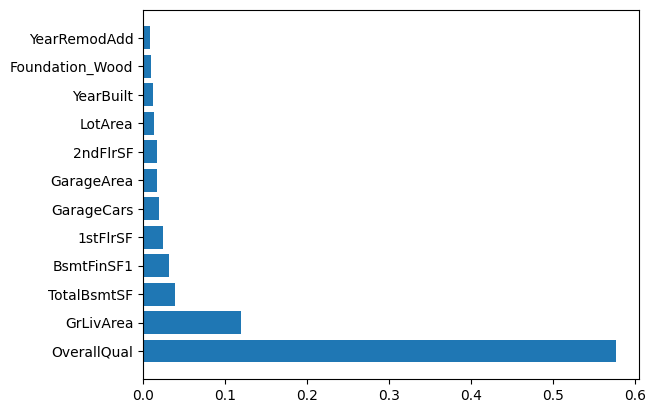

In [ ]:
n =12
plt.barh(range(n), res[sorted_ids[:n]], tick_label=df.columns[sorted_ids[:n]])

In [ ]:
impor = np.array(df.columns[sorted_ids])
impor

array(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', 'GarageCars', 'GarageArea', '2ndFlrSF', 'LotArea',
       'YearBuilt', 'Foundation_Wood', 'YearRemodAdd', 'MoSold',
       'FullBath', 'BsmtUnfSF', 'WoodDeckSF', 'TotRmsAbvGrd',
       'OverallCond', 'OpenPorchSF', 'Fireplaces', 'BsmtQual_Fa',
       'LotShape_IR3', 'Exterior2nd_CmentBd', 'KitchenQual_Fa',
       'BedroomAbvGr', 'GarageType_2Types', 'MSSubClass',
       'GarageType_CarPort', 'MSZoning_RL', 'YrSold', 'ExterQual_Fa',
       'HeatingQC_TA', 'CentralAir_N', 'ExterQual_Gd', 'HalfBath',
       'ScreenPorch', 'Condition1_PosA', 'BsmtFullBath', 'KitchenAbvGr',
       'Electrical_SBrkr', 'BsmtExposure_Av', 'BsmtExposure_Mn',
       'GarageQual_Po', 'KitchenQual_Gd', 'Exterior1st_CemntBd',
       'Condition2_Feedr', 'GarageCond_Po', 'MSZoning_RH',
       'BsmtFinType1_BLQ', 'GarageFinish_RFn', 'Neighborhood_Crawfor',
       'Exterior2nd_Stucco', 'EnclosedPorch', 'SaleType_Oth',
       'GarageType_

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##Limiting Features

###Cleaning Data


In [ ]:
df_limited = df[df.columns[sorted_idx[:16]]]

In [ ]:
df_limited.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'GarageCars', 'GarageArea', 'YearRemodAdd',
       'Exterior2nd_CmentBd', 'BedroomAbvGr', 'LotArea', 'Fireplaces',
       'YearBuilt', 'WoodDeckSF', 'LandContour_Low'],
      dtype='object')

In [ ]:
df_limited = df_limited.drop(columns=['OverallQual'],axis=1)

In [ ]:
X_lim = df_limited
X_train, X_test, y_train, y_test = train_test_split(X_lim, y, random_state=0, test_size=0.2)

###Random Forest

In [ ]:
rfr_lim = RandomForestRegressor()
rfr_lim.fit(X_train, y_train)

print(f"Train Score:\t{rfr_lim.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{rfr_lim.score(X_test,y_test):0.3f}")

scores['lim_RandomForestRegressor'] = rfr_lim.score(X_test,y_test)

Train Score:	0.977
Test Score:	0.858


###Histogram-based Gradient Boosting Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', HistGradientBoostingRegressor() ) ]
lim_hist_pipe = Pipeline(estimators)

lim_hist_pipe.fit(X_train, y_train)

print(f"Train Score:\t{lim_hist_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{lim_hist_pipe.score(X_test,y_test):0.3f}")

scores['Lim_HistGradientBoostingRegressor'] = lim_hist_pipe.score(X_test,y_test)

Train Score:	0.963
Test Score:	0.844


###Linear Regression

In [ ]:
estimators = [('scaler', StandardScaler()), ('reg', LinearRegression() ) ]
lim_lin_pipe = Pipeline(estimators)

lim_lin_pipe.fit(X_train, y_train)

print(f"Train Score:\t{lim_lin_pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{lim_lin_pipe.score(X_test,y_test):0.3f}")

scores['Lim_LinearRegressor'] = lim_lin_pipe.score(X_test,y_test)

Train Score:	0.798
Test Score:	0.561


#Scores

In [ ]:
scores

{'LinearRegressor': -2.6151990238885637e+23,
 'HistGradientBoostingRegressor': 0.8440638637036288,
 'LogisticRegression': 0.010273972602739725,
 'RandomForestRegressor': 0.844648401775557,
 'lim_RandomForestRegressor': 0.8577442537038072,
 'Lim_HistGradientBoostingRegressor': 0.8438457841220616,
 'Lim_LinearRegressor': 0.561177165691517}